In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
df = pd.read_csv('AviationData.csv', low_memory=False)
df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

In [46]:
# Handle missing values
df.fillna({'Total.Fatal.Injuries': 0, 
           'Total.Serious.Injuries': 0, 
           'Total.Minor.Injuries': 0, 
           'Total.Uninjured': 0}, inplace=True)

# Drop rows with missing essential data
df.dropna(subset=['Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight'], inplace=True)

# Convert 'Event.Date' and 'Publication.Date' columns to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], dayfirst=True, errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], dayfirst=True, errors='coerce')

# Verify the changes
print(df[['Event.Date', 'Publication.Date']].dtypes)

print(df.info()) 

Event.Date          datetime64[ns]
Publication.Date    datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 60590 entries, 0 to 63911
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                60590 non-null  object        
 1   Investigation.Type      60590 non-null  object        
 2   Accident.Number         60590 non-null  object        
 3   Event.Date              60590 non-null  datetime64[ns]
 4   Location                60580 non-null  object        
 5   Country                 60377 non-null  object        
 6   Latitude                10601 non-null  object        
 7   Longitude               10591 non-null  object        
 8   Airport.Code            34000 non-null  object        
 9   Airport.Name            36388 non-null  object        
 10  Injury.Severity         60590 non-null  object        
 11  Aircraft.damage         593

In [40]:
# Calculate total fatalities, injuries, and risk by aircraft type
risk_analysis = df.groupby('Purpose.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Add a column for fatality rate
risk_analysis['Fatality.Rate'] = risk_analysis['Total.Fatal.Injuries'] / (
    risk_analysis['Total.Fatal.Injuries'] + risk_analysis['Total.Serious.Injuries'] + risk_analysis['Total.Minor.Injuries'] + risk_analysis['Total.Uninjured']
)

print(risk_analysis.head())

    Purpose.of.flight  Total.Fatal.Injuries  Total.Serious.Injuries  \
0  Aerial Application                 375.0                   390.0   
1  Aerial Observation                 196.0                   153.0   
2            Air Drop                   1.0                     1.0   
3       Air Race/show                  30.0                    21.0   
4          Banner Tow                   4.0                     5.0   

   Total.Minor.Injuries  Total.Uninjured  Fatality.Rate  
0                 663.0           2341.0       0.099496  
1                 209.0            473.0       0.190107  
2                   0.0              2.0       0.250000  
3                  10.0             38.0       0.303030  
4                   5.0             12.0       0.153846  


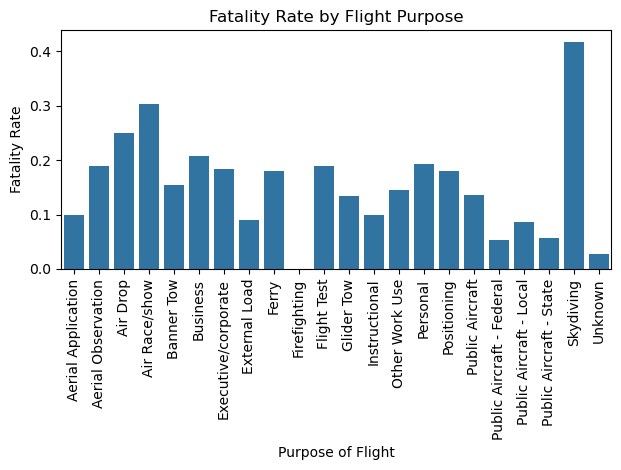

In [41]:
#Risk flight by purpose
sns.barplot(x='Purpose.of.flight', y='Fatality.Rate', data=risk_analysis)
plt.title('Fatality Rate by Flight Purpose')
plt.xlabel('Purpose of Flight')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

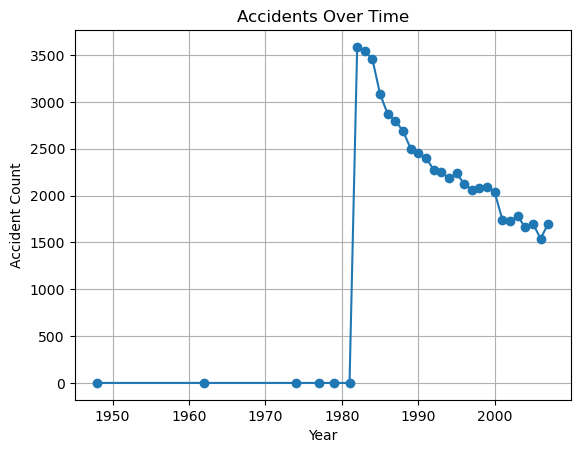

In [42]:
# Accidents over time
accidents_over_time = df.groupby(df['Event.Date'].dt.year).size().reset_index(name='Accident.Count')
plt.plot(accidents_over_time['Event.Date'], accidents_over_time['Accident.Count'], marker='o')
plt.title('Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid()
plt.show()

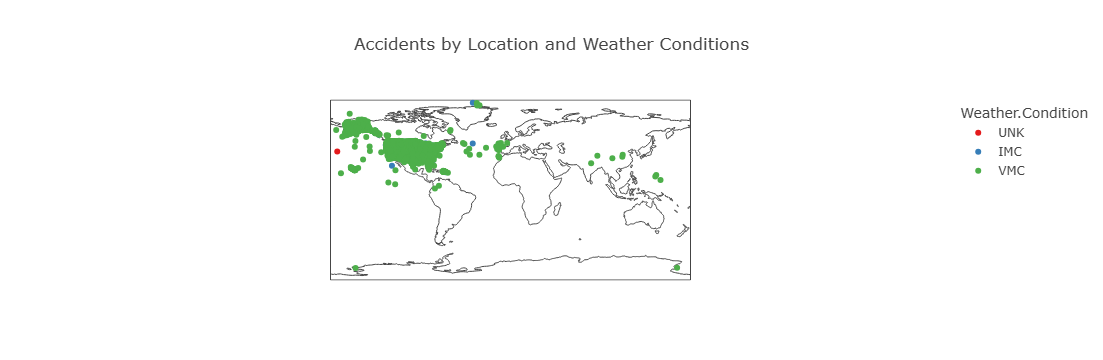

In [54]:
#Interactive map of accident locations
import plotly.express as px

# Create an interactive map with color representing a meaningful column
fig = px.scatter_geo(
    df, 
    lat='Latitude', 
    lon='Longitude', 
    hover_name='Location',  
    color='Weather.Condition',  
    title='Accidents by Location and Weather Conditions',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

Text(0.5, 1.0, 'Injury Distribution by Purpose of Flight')

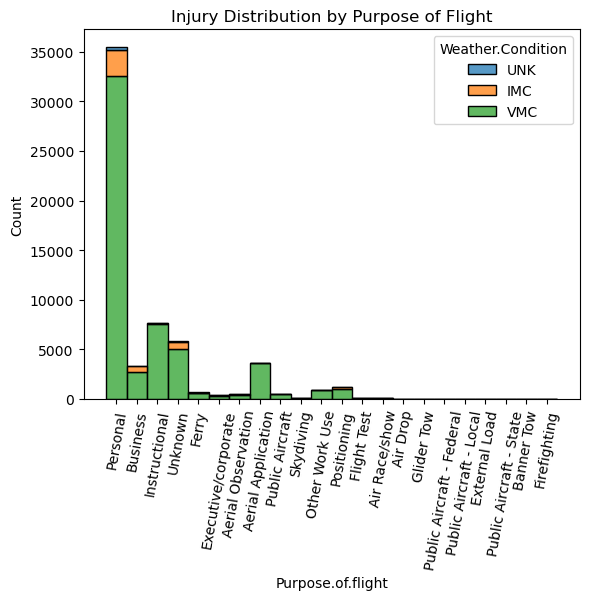

In [55]:
sns.histplot(data=df, 
             x='Purpose.of.flight', 
             hue='Weather.Condition', 
             multiple='stack')
plt.xticks(rotation=80)
plt.title('Injury Distribution by Purpose of Flight')

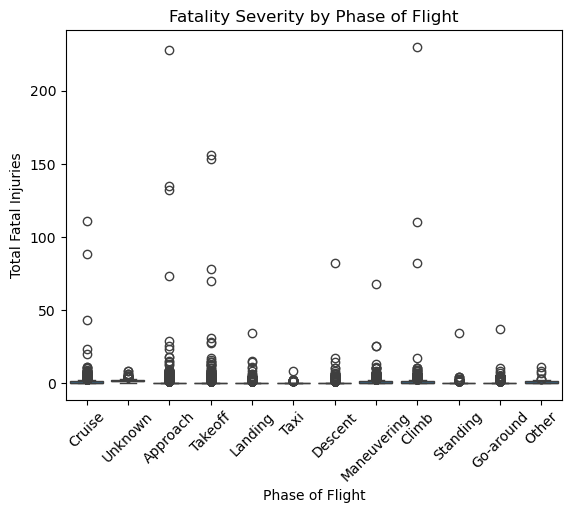

In [45]:
# Box Plot for Fatality Severity by Phase of Flight
sns.boxplot(x='Broad.phase.of.flight', y='Total.Fatal.Injuries', data=df)
plt.title('Fatality Severity by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Fatal Injuries')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()